# Predicting Adult Census Income Using XGBoost Tree Boosting System
### Haibin Lai
### 12211612

### 2024/6/7

Tree boosting is a highly effective and widely used machine learning method. In this project, we learn a model on an Adult Census Income dataset by implementing XGBoost method from \cite{ref1}. 


## 1 Data Preparation and Wrangling 
### 1.1 Data Preparation



In [10]:
import autogluon as ag
import pandas as pd
from autogluon.tabular import TabularDataset
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split



In [11]:
train_data = pd.read_csv('data/traindata1.csv')
test_data = pd.read_csv('data/testdata1.csv')

test_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,71,Private,157909,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,2964,0,60,United-States
1,34,Private,226443,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States
2,36,Private,311255,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0,0,40,Haiti
3,32,Private,229732,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States
4,20,Private,212582,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,16,United-States


In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9769 entries, 0 to 9768
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             9769 non-null   int64 
 1   workclass       9769 non-null   object
 2   fnlwgt          9769 non-null   int64 
 3   education       9769 non-null   object
 4   education.num   9769 non-null   int64 
 5   marital.status  9769 non-null   object
 6   occupation      9769 non-null   object
 7   relationship    9769 non-null   object
 8   race            9769 non-null   object
 9   sex             9769 non-null   object
 10  capital.gain    9769 non-null   int64 
 11  capital.loss    9769 non-null   int64 
 12  hours.per.week  9769 non-null   int64 
 13  native.country  9769 non-null   object
dtypes: int64(6), object(8)
memory usage: 1.0+ MB


**Result Explained**
The result tells us there are 9769 rows and 13 columns, and the name of each column, with the data type.
The info() method also tells us how many Non-Null values there are present in each column, and in our data set there are no Null values in our data set.

Empty values, or Null values, can be bad when analyzing data, we do this to clean our data.

In [13]:
test_data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
dtype: int64

In [14]:

test_data.loc[test_data.duplicated() == True]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
5187,28,Private,274679,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States
9239,35,Private,379959,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States


In [15]:
test_data[test_data.duplicated()]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
5187,28,Private,274679,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States
9239,35,Private,379959,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States


In [16]:

test_data.describe()


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,9769.000000,9.769000e+03,9769.000000,9769.000000,9769.000000,9769.000000
mean,38.737332,1.900481e+05,10.092742,1146.301669,90.403828,40.395844
std,13.640388,1.055568e+05,2.545692,7743.536243,408.711702,12.428717
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.177790e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.788180e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.381880e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Text(0, 0.5, 'Frequency')

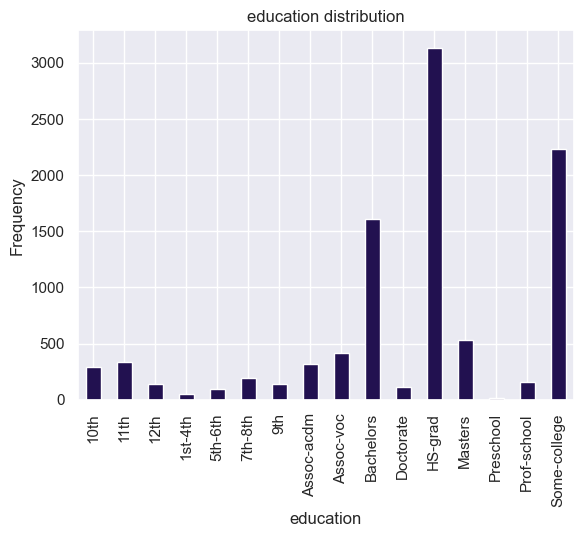

In [17]:

count_classes = pd.value_counts(test_data['education'], sort=True).sort_index()
count_classes.plot(kind='bar')
plt.title("education distribution")
plt.xlabel("education")
plt.ylabel("Frequency")


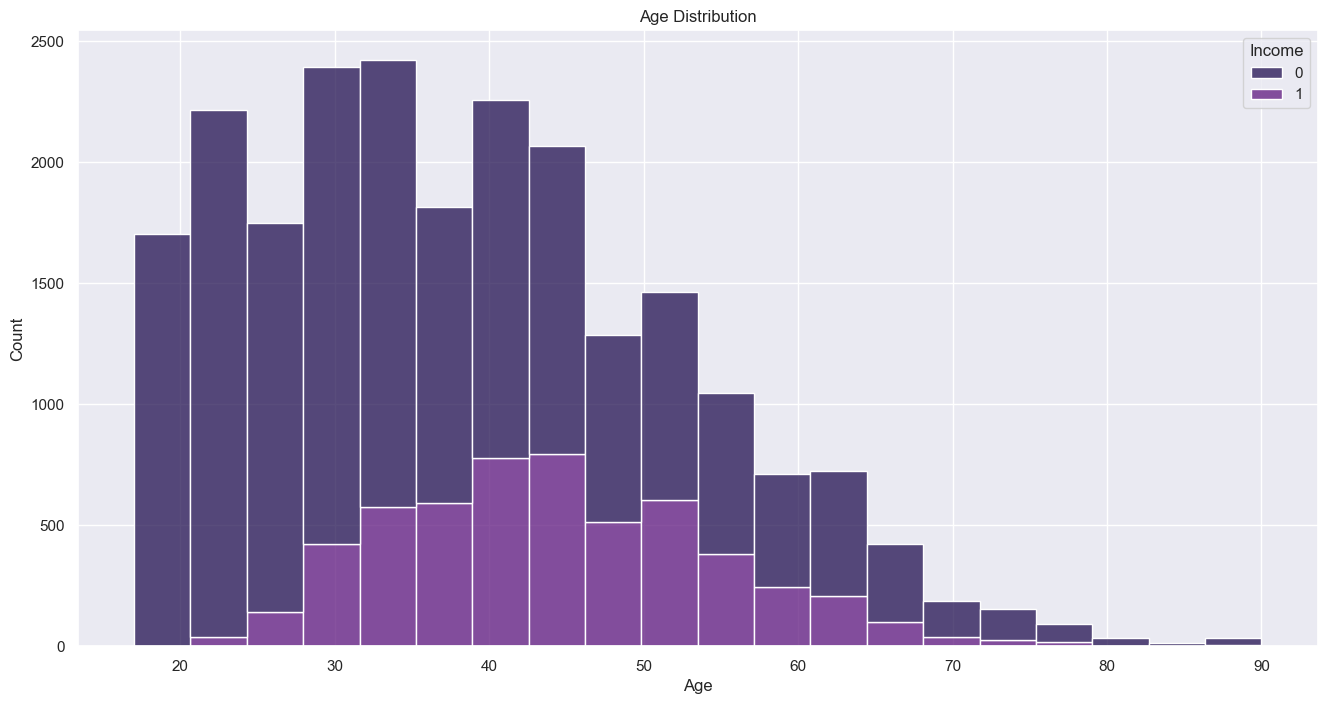

In [18]:

# count_classes = pd.value_counts(test_data['age'], sort=True).sort_index()
# count_classes.plot(kind='bar')
# plt.title("age distribution")
# plt.xlabel("age")
# plt.ylabel("Frequency")

# Age
plt.figure(figsize=(16, 8))
sns.set_theme(style="darkgrid")
sns.set_palette("magma")
sns.histplot(data=train_data, x='age', hue='Income', bins=20, multiple='stack')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

Text(0, 0.5, 'Frequency')

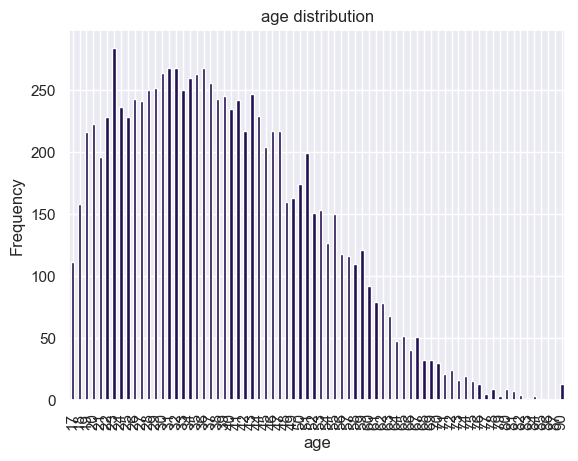

In [19]:
count_classes = pd.value_counts(test_data['age'], sort=True).sort_index()
count_classes.plot(kind='bar')
plt.title("age distribution")
plt.xlabel("age")
plt.ylabel("Frequency")


In [20]:

import tensorboard
test_data['education']

0       Some-college
1        Prof-school
2            HS-grad
3          Bachelors
4       Some-college
            ...     
9764       Bachelors
9765         HS-grad
9766       Bachelors
9767         HS-grad
9768    Some-college
Name: education, Length: 9769, dtype: object